# Stages of Computation

In [1]:
from uarray import *
from uarray.visualize import visualize_expression
import numpy

In [2]:
a = with_dims(unbound("a"), 1)
b = with_dims(unbound("b"), 1)

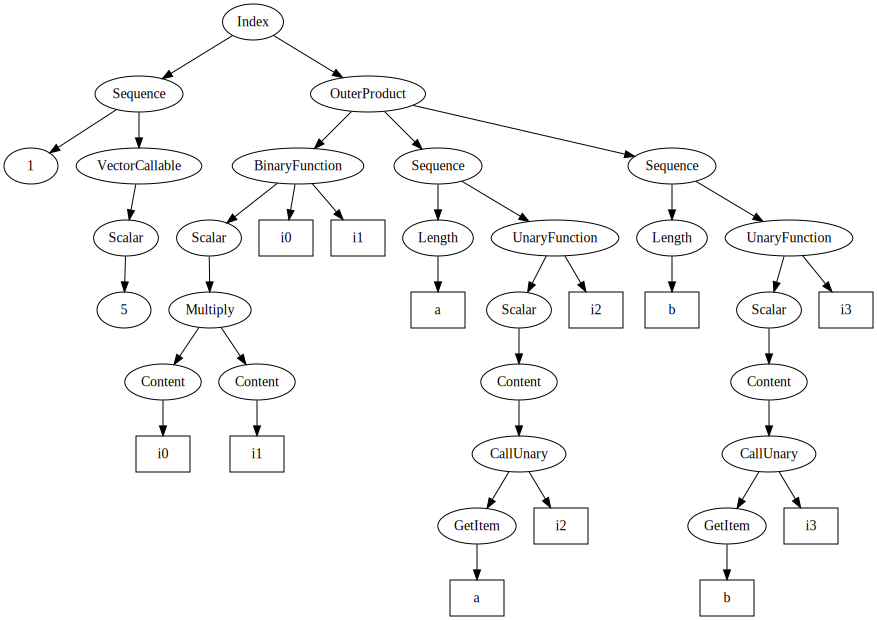

In [3]:
a = with_dims(unbound("a"), 1)
b = with_dims(unbound("b"), 1)

res = Index(vector(5), OuterProduct(multiply, a, b))
visualize_expression(res)

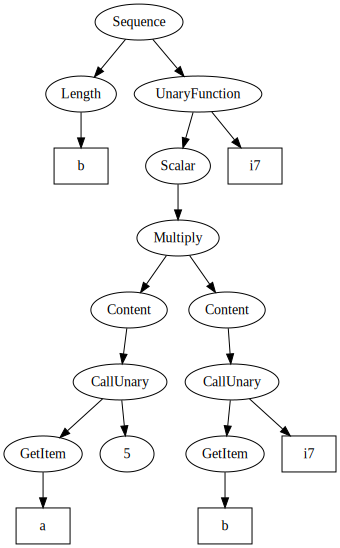

In [6]:
visualize_expression(replace(res))

In [7]:
numpy.multiply.outer(LazyNDArray(a), LazyNDArray(b))[5]


LazyNDArray(
    Index(
        Sequence(Int(1), VectorCallable(Scalar(Int(5)))),
        OuterProduct(
            BinaryUfunc(np.ufunc(multiply)),
            Sequence(
                Length(Unbound(variable_name="a")),
                UnaryFunction(
                    Scalar(Content(CallUnary(GetItem(Unbound(variable_name="a")), Unbound(variable_name="i2")))),
                    Unbound(variable_name="i2"),
                ),
            ),
            Sequence(
                Length(Unbound(variable_name="b")),
                UnaryFunction(
                    Scalar(Content(CallUnary(GetItem(Unbound(variable_name="b")), Unbound(variable_name="i3")))),
                    Unbound(variable_name="i3"),
                ),
            ),
        ),
    )
)


In [9]:
@optimize(1, 1)
def outer_then_index(a, b):
    return numpy.multiply.outer(a, b)[5]

In [11]:
outer_then_index.__optimize_steps__.keys()

dict_keys(['args', 'resulting_expr', 'all_replaced', 'wrapped_expr', 'ast', 'ast_as_source'])

In [17]:
print(outer_then_index.__optimize_steps__['ast_as_source'])



def fn(a, b):
    i_7 = ()
    i_8 = b.shape[0]
    i_3 = ((i_8,) + i_7)
    i_0 = np.empty(i_3)
    i_4 = b.shape[0]
    for i_5 in range(i_4):
        i_6 = i_0[i_5]
        i_1 = 5
        i_2 = a
        i_11 = i_2[i_1]
        i_9 = i_5
        i_10 = b
        i_12 = i_10[i_9]
        i_6 = (i_11 * i_12)
        i_0[i_5] = i_6
    return i_0



In [13]:
!pip install astmonkey

  Using cached https://files.pythonhosted.org/packages/71/e8/6777f6624681c8b9701a8a0a5654f3eb56919a01a78e12bf3c73f5a3c714/pyparsing-2.3.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for astmonkey ... done
  Stored in directory: /Users/saul/Library/Caches/pip/wheels/54/2a/7f/21a87a5e1c63ab2f9604f1ef8e50d5eb29770034a669968b4a
Successfully built astmonkey


In [15]:
from astmonkey import visitors, transformers

node = outer_then_index.__optimize_steps__['ast']
node = transformers.ParentChildNodeTransformer().visit(node)
visitor = visitors.GraphNodeVisitor()
visitor.visit(node)

visitor.graph.write_png('graph.png')

In [16]:
!ls 

2018.10.25 Einsum Numpy.ipynb
2018.10.31 Numpy Einsum Exploration.ipynb
2018.11.01 NumPy Tranpose.ipynb
2018.11.02 Adding Reverse.ipynb
2018.11.09 Meeting 2.py
2018.11.09 Meeting.py
2018.11.09 Quasiquotes.py
2018.11.11 Test Core.py
2018.11.20 PyData Presentation.ipynb
2018.12.02 mtypes notes.py
Broadcasting Timing.ipynb
Native.ipynb
NumPy Broadcasting.ipynb
NumPy Compat.ipynb
Stages.ipynb
Transpose Test.ipynb
Uarray Parser.ipynb
Uarray Visualization.ipynb
_matchpy duplicate matching.ipynb
_matchpy get variable na,e.ipynb
_matchpy matching.ipynb
_ufl example.ipynb
graph.png
